In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from matplotlib.colors import ListedColormap


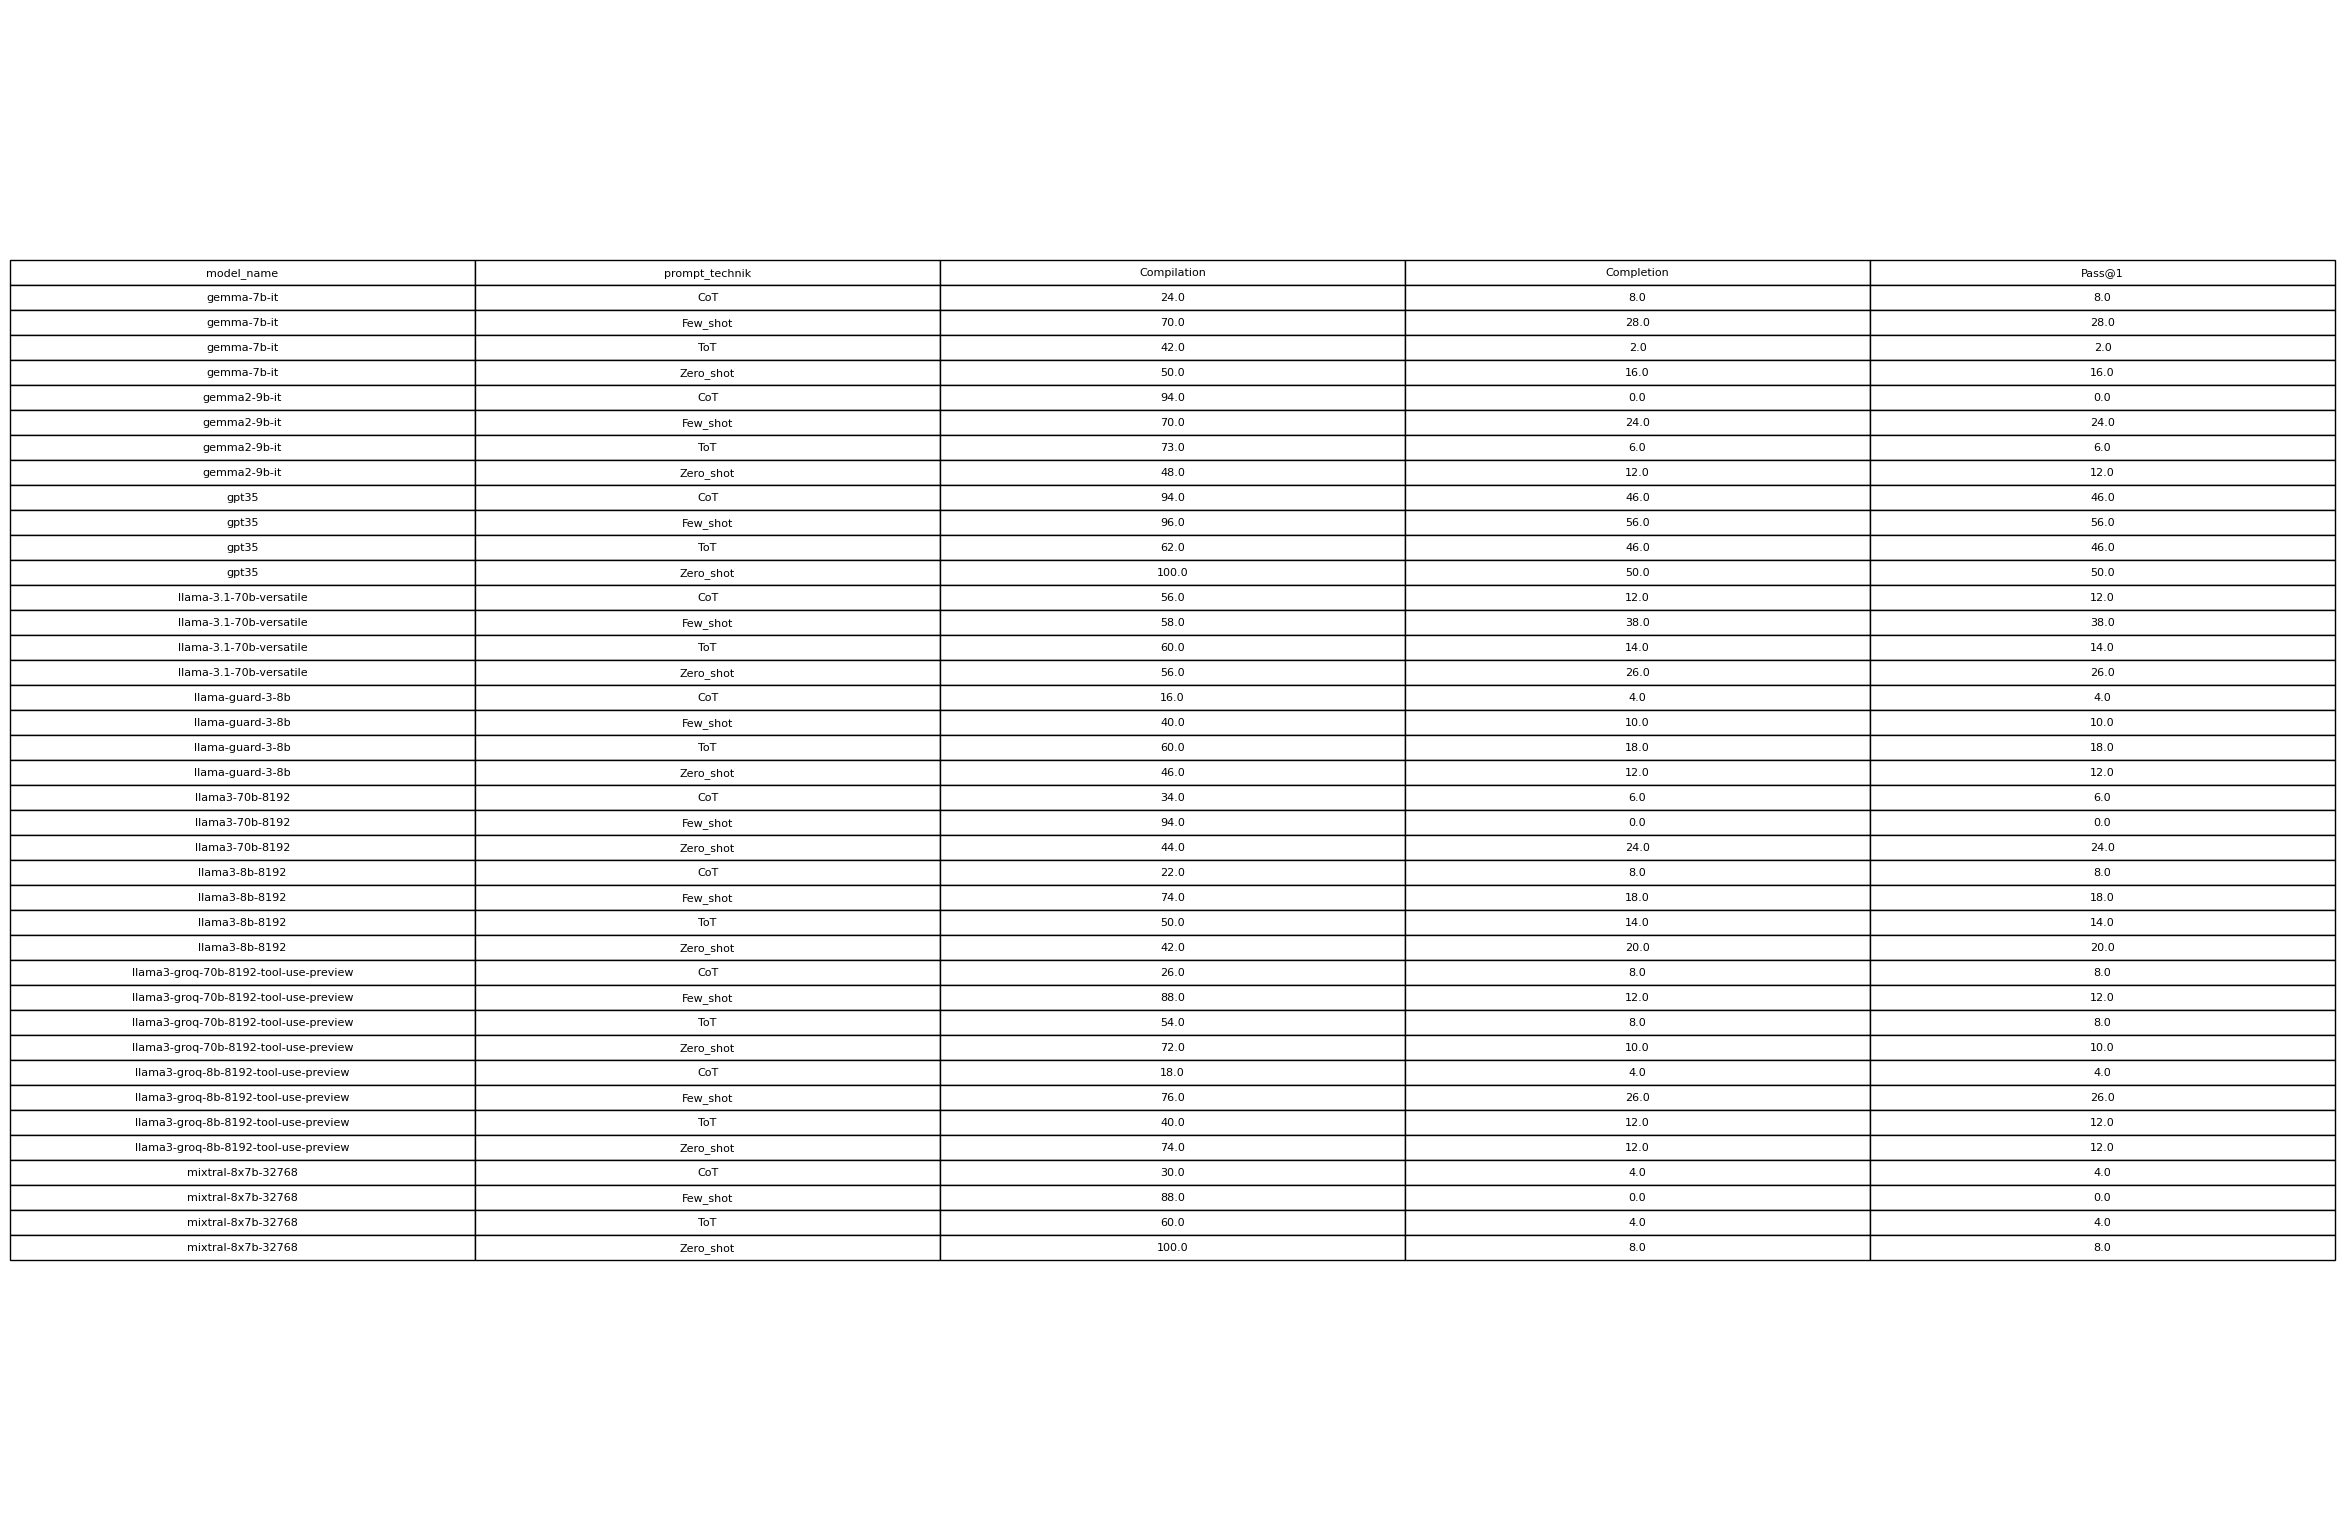

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Lade die CSV-Datei
csv_file = 'pass@1_output.csv'
df = pd.read_csv(csv_file)

# Spalten für die Punkte (Scores)
points_columns = {
    'completion_score': 'Completion',
    'compilable_score': 'Compilation',
    'pass_at_k': 'Pass@1'
}

# Gruppiere die Daten nach 'model_name', 'prompt_technik' und berechne den Mittelwert der Punkte
grouped_df = df.groupby(['model_name', 'prompt_technik'])[list(points_columns.keys())].mean().reset_index()
# Runden und in Prozent umrechnen
for col in points_columns.keys():
    grouped_df[col] = (grouped_df[col] * 100).round(3)

# Umstrukturieren der Daten, um prompt_technik in eine eigene Spalte unterhalb von model_name zu platzieren
table_df = grouped_df.melt(id_vars=['model_name', 'prompt_technik'], value_vars=list(points_columns.keys()), 
                           var_name='Metric', value_name='Score')

# Pivot-Tabelle erstellen, um die Metriken als Spalten darzustellen
pivot_df = table_df.pivot_table(index=['model_name', 'prompt_technik'], columns='Metric', values='Score').reset_index()

# Sortieren nach model_name und prompt_technik für bessere Lesbarkeit
pivot_df = pivot_df.sort_values(by=['model_name', 'prompt_technik'])

# Definiere die Tabelle, die geplottet wird
final_df = pivot_df.rename(columns=points_columns)  # Umbenennen der Metrik-Spalten
final_df.to_csv('eval_pass@k.csv', index=False)
# Erstelle eine Tabelle als Plot
fig, ax = plt.subplots(figsize=(20, len(final_df) * 0.5))  # Dynamische Höhe basierend auf der Anzahl der Zeilen
ax.axis('tight')
ax.axis('off')

# Erstelle eine Tabelle in der Matplotlib-Figur
table = ax.table(cellText=final_df.values, colLabels=final_df.columns, cellLoc='center', loc='center')

# Setze die Schriftgröße und skaliere die Tabelle
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.5, 1.5)

# Zeige die Tabelle an
plt.show()
